In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [62]:
data = pd.read_excel(os.path.join('data','CAPQ-TCGA.xlsx'), sheet_name=None)    

In [63]:
data['ROC'].replace('#DIV/0!', np.nan, inplace=True)

/tmp/ipykernel_75310/217589481.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['ROC'].replace('#DIV/0!', np.nan, inplace=True)


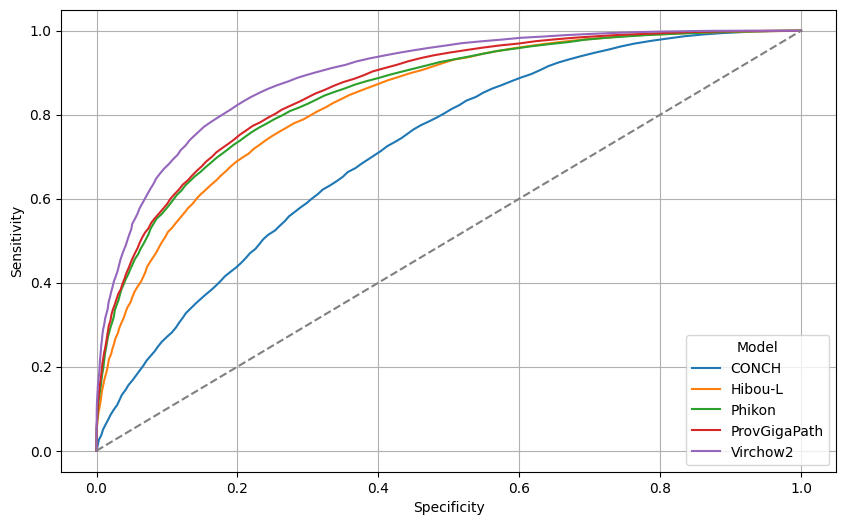

In [92]:

# Ensure the 'Sensitivity' and '1-Specificity' columns are numeric
data['ROC']['Sensitivity'] = pd.to_numeric(data['ROC']['Sensitivity'], errors='coerce')
data['ROC']['Specificity'] = pd.to_numeric(data['ROC']['Specificity'], errors='coerce')
data['ROC'].sort_values(by=['threshold'], inplace=True)


grouped_data = data['ROC'].groupby('ShortName')

# Create a plot
plt.figure(figsize=(10, 6))

# Loop through each group and plot the ROC curve for each 'ShortName'
for name, group in grouped_data:
    plt.plot(group['false_positive_rate'], group['recall'], label=name)

# Add a diagonal line representing random guessing
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Add labels and title
plt.xlabel('Specificity')
plt.ylabel('Sensitivity')

plt.title('ROC Curves')
plt.legend(title='Model')
plt.grid(True)

# Show the plot
plt.show()

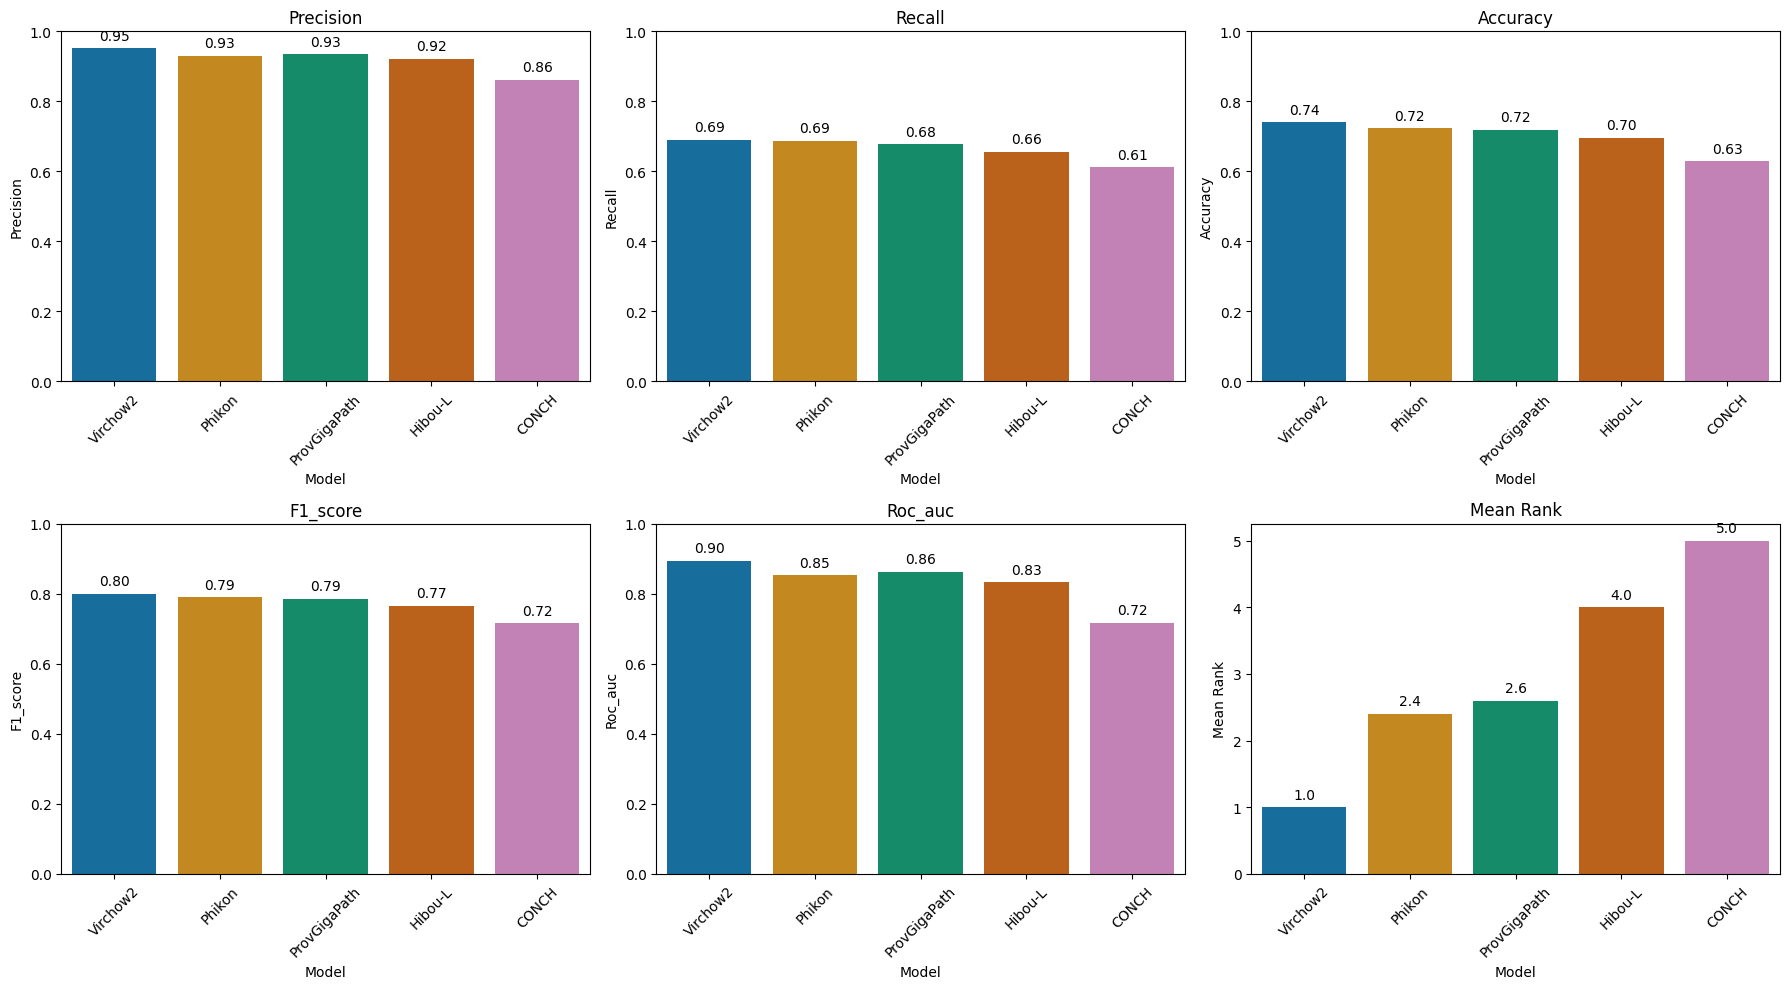

In [87]:
data['Evaluate']['ShortName'] = ['Phikon', 'CONCH', 'Hibou-L', 'ProvGigaPath', 'Virchow2']
data_evaluate = data['Evaluate']
# The metrics to plot
metrics = ['precision', 'recall', 'accuracy', 'f1_score', 'roc_auc']

data_evaluate['mean_rank'] = data_evaluate[metrics].rank(ascending=False).mean(axis=1)
data_evaluate_sorted = data_evaluate.sort_values(by='mean_rank')

# Set up the size of the entire figure based on the number of metrics + 1 for the rank order graph
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

def add_labels(ax, metric, is_mean_rank=False):
    for p in ax.patches:
        value = f'{p.get_height():.1f}' if is_mean_rank else f'{p.get_height():.2f}'
        ax.annotate(value, (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 9), textcoords='offset points')



# Flatten axes for easier iteration
axes = axes.flatten()

# Loop through each metric and create a bar plot with colorblind-friendly palette, ordered by mean rank
for i, metric in enumerate(metrics):
    sns.barplot(x='ShortName', y=metric, data=data_evaluate_sorted, hue='ShortName', ax=axes[i], palette='colorblind')
    axes[i].set_title(f'{metric.capitalize()}')
    axes[i].set_xlabel('Model')
    axes[i].set_ylabel(metric.capitalize())
    axes[i].tick_params(axis='x', rotation=45)
    add_labels(axes[i], metric)
    axes[i].set_ylim(0, 1.0)  # Set max y-axis value


# Create a bar plot for the mean rank, also ordered by mean rank
sns.barplot(x='ShortName', y='mean_rank', data=data_evaluate_sorted, ax=axes[-1], hue='ShortName', palette='colorblind')
axes[-1].set_title('Mean Rank')
axes[-1].set_xlabel('Model')
axes[-1].set_ylabel('Mean Rank')
axes[-1].tick_params(axis='x', rotation=45)
add_labels(axes[-1], 'mean_rank', is_mean_rank=True)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()